## Creating a License plte detection and recognition model using a pretrained yolov8 model.

### First install all the Libraries such as EasyOCR and ultralytics

In [ ]:
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 11.7 MB/s eta 0:00:00


### Now create the fuctions to train the model on custom dataset

In [ ]:
from ultralytics import YOLO
import easyocr
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd

# Load YOLOv8 model (replace with your trained model path if needed)
model = YOLO("yolov8n.pt")

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Directory containing images
image_dir = '/content/drive/MyDrive/license_plates_detection_train'

# Create a list to store results
results_data = []

# Function to process and OCR plates
def store_detect_and_recognize_plate(image_path):
    image = cv2.imread(image_path)
    results = model(image_path)[0]

    image_results = []

    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        plate_crop = image[y1:y2, x1:x2]

        # OCR
        ocr_results = reader.readtext(plate_crop)

        for (bbox, text, conf) in ocr_results:
            image_results.append({
                "image": os.path.basename(image_path),
                "text": text,
                "confidence": conf
            })

    return image_results

# Loop through images in the directory
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        full_path = os.path.join(image_dir, filename)
        ocr_data = store_detect_and_recognize_plate(full_path)
        results_data.extend(ocr_data)

# Create DataFrame
df = pd.DataFrame(results_data)

# Display the DataFrame
print(df.head())

# Optional: Save to CSV
df.to_csv("recognized_license_plates.csv", index=False)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 70.9MB/s]


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
image 1/1 /content/drive/MyDrive/license_plates_detection_train/23.jpg: 640x480 1 truck, 372.0ms
Speed: 23.8ms preprocess, 372.0ms inference, 31.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/license_plates_detection_train/38.jpg: 384x640 1 car, 162.5ms
Speed: 3.4ms preprocess, 162.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/license_plates_detection_train/21.jpg: 480x640 1 car, 302.4ms
Speed: 5.4ms preprocess, 302.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/license_plates_detection_train/24.jpg: 480x640 1 car, 185.5ms
Speed: 3.6ms preprocess, 185.5ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/license_plates_detection_train/14.jpg: 384x640 1 car, 145.2ms
Speed: 3.0ms preprocess, 145.2ms inference, 1.

In [ ]:
pd.read_csv("recognized_license_plates.csv")

,image,text,confidence
0,23.jpg,4672,0.520246
1,38.jpg,765,0.637137
2,38.jpg,8951,0.982577
3,38.jpg,[80;,0.001334
4,21.jpg,146 u,0.618341
...,...,...,...
1793,878.jpg,1193 96926],0.328041
1794,898.jpg,158 _x3 536,0.111561
1795,867.jpg,93,0.999993
1796,867.jpg,7868,0.688150


### Use the same model to run on Test dataset

In [ ]:

# Directory containing images
image_dir = '/content/drive/MyDrive/test'


for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        full_path = os.path.join(image_dir, filename)
        ocr_data = store_detect_and_recognize_plate(full_path)
        results_data.extend(ocr_data)

# Create DataFrame
df = pd.DataFrame(results_data)

# Display the DataFrame
print(df.head())

# Optional: Save to CSV
df.to_csv("recognized_license_plates_test.csv", index=False)


image 1/1 /content/drive/MyDrive/test/1005.jpg: 640x384 4 cars, 260.1ms
Speed: 6.5ms preprocess, 260.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /content/drive/MyDrive/test/1016.jpg: 480x640 2 cars, 1 truck, 189.4ms
Speed: 3.4ms preprocess, 189.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/test/1010.jpg: 640x384 1 truck, 296.6ms
Speed: 7.7ms preprocess, 296.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /content/drive/MyDrive/test/1009.jpg: 384x640 3 cars, 227.2ms
Speed: 4.2ms preprocess, 227.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/test/1027.jpg: 384x640 6 cars, 1 truck, 145.4ms
Speed: 2.8ms preprocess, 145.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/test/1024.jpg: 384x640 1 truck, 152.4ms
Speed: 3.3ms preprocess, 152.4ms inference, 1.4ms po

In [ ]:
pd.read_csv("recognized_license_plates_test.csv")

,image,text,confidence
0,23.jpg,4672,0.520246
1,38.jpg,765,0.637137
2,38.jpg,8951,0.982577
3,38.jpg,[80;,0.001334
4,21.jpg,146 u,0.618341
...,...,...,...
2233,987.jpg,Uny 4716,0.105300
2234,997.jpg,Lucd,0.073845
2235,997.jpg,[165047878,0.185288
2236,997.jpg,Juceo{,0.039220


### Created the function to visualize each image


image 1/1 /content/drive/MyDrive/license_plates_detection_train/133.jpg: 640x512 1 person, 2 cars, 1 truck, 331.8ms
Speed: 10.4ms preprocess, 331.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)
[/content/drive/MyDrive/license_plates_detection_train/133.jpg] Plate Text: 595y 6719 | Confidence: 0.45


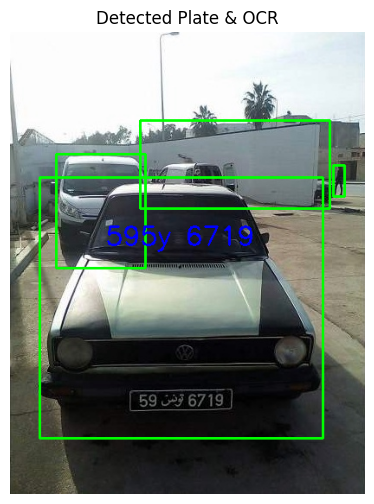

In [ ]:
reader = easyocr.Reader(['en'])

def detect_and_recognize_plate(image_path):
    image = cv2.imread(image_path)
    results = model(image_path)[0] # Now 'model' is defined and should work

    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        plate_crop = image[y1:y2, x1:x2]

        # OCR
        ocr_results = reader.readtext(plate_crop)

        # Draw box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 2)

        # Display OCR results
        for (bbox, text, conf) in ocr_results:
            (tl, _, _, _) = bbox
            tl = tuple(map(int, tl))
            cv2.putText(image, text, tl, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
            print(f"[{image_path}] Plate Text: {text} | Confidence: {conf:.2f}")

    # Show the image
    plt.figure(figsize=(10,6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected Plate & OCR')
    plt.show()

image_path = '/content/drive/MyDrive/license_plates_detection_train/133.jpg'  # replace with your image
detect_and_recognize_plate(image_path)